In [54]:
import matplotlib.pyplot as plt
import numpy as np
import serial
import re

from IPython.display import clear_output
from tqdm import tqdm, trange

def trace(title=None, n=100, filename=None, port='COM6'):
    voltage = []
    current = []
       
    with serial.Serial(port=port, baudrate=115200, timeout=0.1) as s:
        s.reset_input_buffer()

        for j in trange(n):
            data = s.readline().decode('utf-8')

            match = re.search(r'(\-?\d\.\d\d),(\-?\d\.\d\d)', data)

            if match:
                v, i= match.groups()

                voltage.append(float(v))
                current.append(float(i))

    plt.scatter(voltage, current, s=2, c='k')

    plt.xlabel('Voltage (V)')
    plt.ylabel('Current (mA)')

    plt.axhline(0, color='black', linewidth=1, linestyle=':')
    plt.axvline(0, color='black', linewidth=1, linestyle=':')
    
    plt.xlim([-1.5, 3])

    if title:
        plt.title('I-V Curve for %s' % title)
    else:
        plt.title('I-V Curve')

    plt.grid(which='both', linestyle=':')
    
    if filename:
        plt.savefig(filename)
    
    plt.show()
    
    return voltage, current

In [39]:
trace(title='1N4001 Diode', n=1000, filename='diode.png')

293 of 1000...


KeyboardInterrupt: 

0 of 1000...
100 of 1000...
200 of 1000...
300 of 1000...
400 of 1000...
500 of 1000...
600 of 1000...
700 of 1000...
800 of 1000...
900 of 1000...


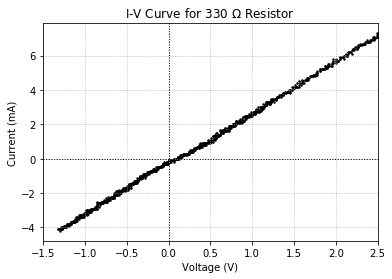

In [22]:
voltage, current = trace(title='330 $\Omega$ Resistor', n=1000, filename='330 ohm.png')

In [27]:
m, b = np.polyfit(np.asarray(current) / 1000, voltage, 1)
print(m)
print(b)

339.254809141
0.0892367835886


In [28]:
9/330

0.02727272727272727

In [56]:
trace(title='Red LED', n=10000, filename='red led.png')


 20%|███████████████▋                                                             | 2033/10000 [02:14<08:46, 15.12it/s]

KeyboardInterrupt: 

 20%|███████████████▋                                                             | 2033/10000 [02:29<09:44, 13.64it/s]